In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import  mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



In [2]:
start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2019,12,1)



df = yf.download('AMZN', start_date, end_date)

#df = pd.read_csv('GBPCADH1.csv', index_col = 0)

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-22,1739.02,1746.43,1731.00,1745.72,1745.72,2479100
2019-11-25,1753.25,1777.42,1753.24,1773.84,1773.84,3486200
2019-11-26,1779.92,1797.03,1778.35,1796.94,1796.94,3181200
2019-11-27,1801.00,1824.50,1797.31,1818.51,1818.51,3025600
2019-11-29,1817.78,1824.69,1800.79,1800.80,1800.80,1923400


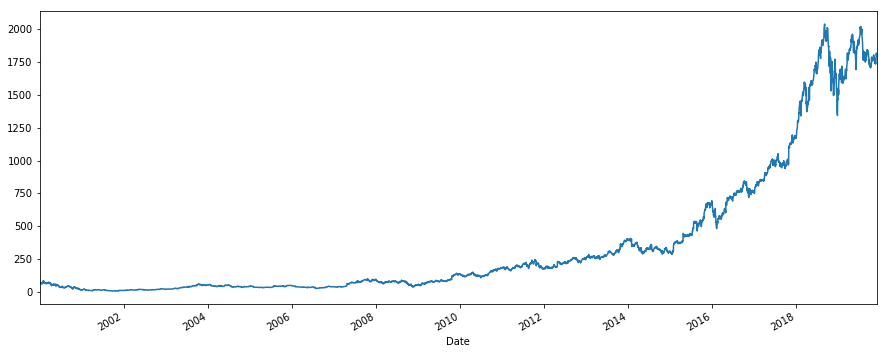

In [4]:
df['Adj Close'].plot(figsize=(15,6))

# The strategy

Yesterday must have been a down day of at least 0.25%.
If XLP opens down more than 0.1% today, go long and exit on the close.

In [5]:
lag = 20
lag1 = 90
stdata = pd.DataFrame(index = df.index)
stdata['cc'] = 100*df['Adj Close'].pct_change()     # Close to close percentage change
stdata['co'] = 100*(df['Open']/df['Adj Close'].shift(1) -1)   # Previous close to today open
stdata['oc'] = 100*(df['Adj Close']/df['Open'] -1)   # Previous close to today open
stdata['Vol90'] = df['Adj Close'].rolling(window = lag, center = False).std()
stdata['Vol90i'] = df['Adj Close'].rolling(window = lag, center = False).std().shift(lag1)
stdata['Rvol'] = stdata['Vol90']/stdata['Vol90i']

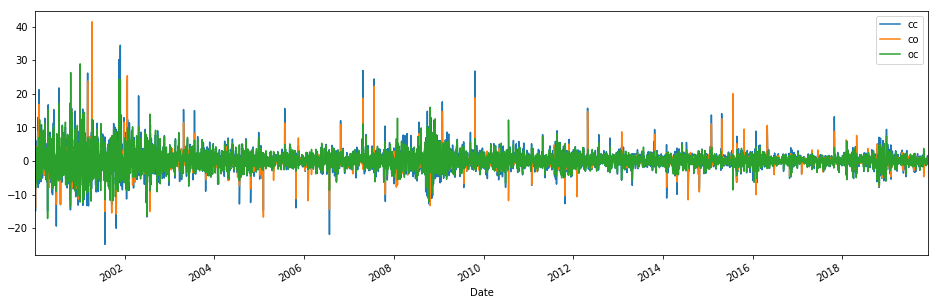

In [6]:
stdata[['cc','co','oc']].plot(figsize = (16,5))

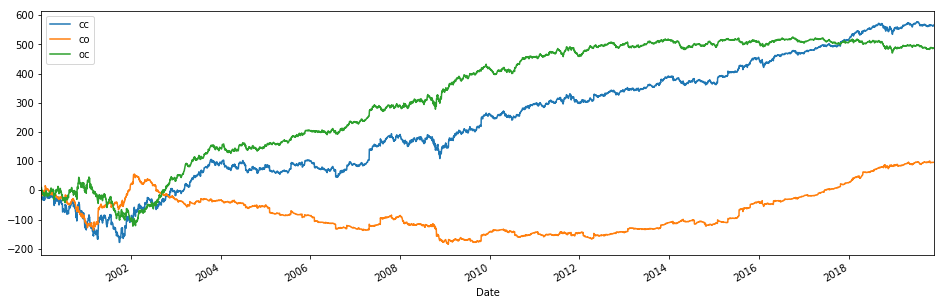

In [7]:
# Cumulative return

stdata[['cc','co','oc']].cumsum().plot(figsize = (16,5))


In [8]:
# Most of the return is obtained from overnight (co) and close to close

In [8]:
# Sharpe ratio of the close to close

sharpe = (252**0.5)*(stdata['cc'].mean())/stdata['cc'].std()
sharpe

0.5456393760723264

# Strategy simulations

In [9]:
idx = (stdata['cc'] > 0.25).shift(1) & (stdata['co'] > 0.1) #& (stdata['Rvol'] > 1)

idx[0] = False

stdata['long'] = idx

stdata['pnl'] = 0. #initial pnl

stdata['pnl'][idx] = stdata['oc'][idx] 

stdata.tail(20)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,cc,co,oc,Vol90,Vol90i,Rvol,long,pnl
Date,,,,,,,,
2019-11-01,0.831898,0.638839,0.191833,25.425417,69.813332,0.364191,False,0.000000
2019-11-04,0.737954,0.534207,0.202664,26.555959,70.853939,0.374799,True,0.202664
2019-11-05,-0.163466,0.249354,-0.411793,24.264299,69.493115,0.349161,True,-0.411793
2019-11-06,-0.329687,-0.039407,-0.290394,22.524683,59.994115,0.375448,False,0.000000
2019-11-07,-0.421546,0.444934,-0.862642,19.334330,52.876200,0.365653,False,0.000000
2019-11-08,-0.129739,-0.017336,-0.112423,16.642315,44.036089,0.377924,False,0.000000
2019-11-11,-0.796806,-0.441239,-0.357143,13.691929,33.714590,0.406113,False,0.000000
2019-11-12,0.358423,0.169898,0.188205,13.418271,28.899490,0.464308,False,0.000000
2019-11-13,-1.399888,-0.259280,-1.143572,14.668260,33.241302,0.441266,False,0.000000


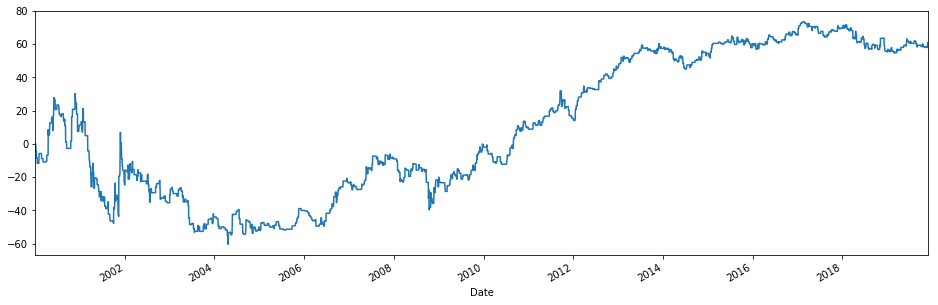

In [10]:
stdata['pnl'].cumsum().plot(figsize = (16,5))

In [11]:
sharpe = (stdata['pnl'].mean())/stdata['pnl'].std()
sharpe = (252**0.5)*sharpe
sharpe

0.15257038183082294

In [12]:
def backtestfct(df, cctresh = 0.25, cotresh = 0.1):   #, Rvoltresh = 1
    stdata = pd.DataFrame(index = df.index)
    stdata['cc'] = 100*df['Adj Close'].pct_change()     # Close to close percentage change
    stdata['co'] = 100*(df['Open']/df['Adj Close'].shift(1) -1)   # Previous close to today open
    stdata['oc'] = 100*(df['Adj Close']/df['Open'] -1)   # Previous close to today open
    #stdata['Vol90'] = df['Adj Close'].rolling(window = lag, center = False).std()
    #stdata['Vol90i'] = df['Adj Close'].rolling(window = lag, center = False).std().shift(lag1)
    #stdata['Rvol'] = stdata['Vol90']/stdata['Vol90i']
    
    
    idx = (stdata['cc'] > cctresh).shift(1) & (stdata['co'] > cotresh) # & (stdata['Rvol'] > Rvoltresh)

    idx[0] = False 

    stdata['long'] = idx

    stdata['pnl'] = 0. #initial pnl

    stdata['pnl'][idx] = stdata['oc'][idx]
    
    return stdata['pnl']


# Scan for parameters optimization

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


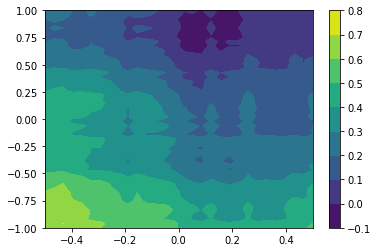

In [13]:
cctresh = np.linspace(-1,1,50)
cotresh = np.linspace(-0.5,0.5,30)
# Rvoltresh = np.linspace(0.5,4,30)

SR = np.zeros((len(cctresh),len(cotresh)))

for i, cc in enumerate(cctresh):
    for j, co in enumerate(cotresh):        #for k, rv in enumerate(Rvoltresh):
        pnl = backtestfct(df,cctresh=cc,cotresh=co)  #,Rvoltresh=rv
        SR[i,j] = (252**0.5)*(np.mean(pnl))/(np.std(pnl))
        


        
# Plot the surface. 


fig = plt.figure()

plt.contourf(cotresh,cctresh,SR)

# Add a color bar which maps values to colors.
plt.colorbar()

plt.show()
       
        

# Find the optimized parameters

In [14]:
i,j = np.unravel_index(SR.argmax(), SR.shape)
SR[i,j]
print('optimized cc is',cctresh[i])
print('optimized co is',cotresh[j])

optimized cc is -0.9591836734693877
optimized co is -0.43103448275862066


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


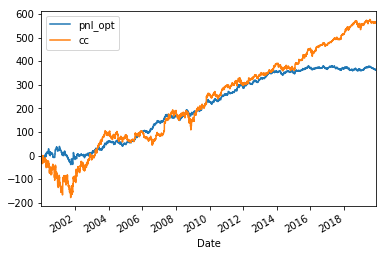

In [15]:
stdata['pnl_opt'] = backtestfct(df, cctresh = -0.96, cotresh = -0.43)

stdata[['pnl_opt','cc']].cumsum().plot()

In [16]:
sharpe = (252**0.5)*(stdata['pnl_opt'].mean())/stdata['pnl_opt'].std()
sharpe

0.701598410885705